In [174]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

warnings.simplefilter("ignore")

In [256]:
## Assign DATA_PATH variable with your path to the csv file for dataset, and ensure we are using the same dataset
DATA_PATH = "../DATA/final_data21-11-2022.csv"

### Dataset metadata

lat - represents latitude 

lon – represents Longitude

XCO2 (mol CO2/mol dry) – This column is the CO2 concentration column

XCO2PREC (mol CO2/mol dry) – This column represents the precision in the measurement of CO2

Month – month 

Year - Year

DATE – Date 

Population – Population at given latitude and longitude

primary_fuel – Valid for power plant type. Whether it is oil, coal, hydro, wind etc based power plant. 

commissioning_year – Year when particular power plant was established

capacity_mw – Capacity in MW of a given power plant 

city_ascii – City name 

capital – Capital of the city 

city_pop_2022 – city population as of 2022 

month – Month 

brightness - brightness temperature of the fire pixel measured in Kelvin.

Scan – Irrelevant Data 

Track – Irrelevant Data 

bright_t31 – brightness temperature of the fire pixel measured in Kelvin.

frp - fire radiative power in MW (megawatts).

City – City 

State - State

plant_type – whether the plant or factory type is cement based plant or oil refinery or steel plant

longitude – longitude 

latitude – latitude 

In [3]:
df = pd.read_csv(DATA_PATH)
df.head()

,lat,lon,XCO2 (mol CO2/mol dry),XCO2PREC (mol CO2/mol dry),Month,Year,DATE,population,primary_fuel,commissioning_year,...,brightness,scan,track,bright_t31,frp,city,state,plant_type,longitude,latitude
0,-5.0,38.75,0.000414,5.420000e-08,2,2021,01-02-21,NaN,NaN,NaN,...,334.72,1.44,1.12,306.50,23.90,NaN,NaN,NaN,NaN,NaN
1,-5.0,38.75,0.000414,3.570000e-08,3,2021,01-03-21,NaN,NaN,NaN,...,330.70,1.15,1.05,306.35,14.65,NaN,NaN,NaN,NaN,NaN
2,-5.0,38.75,0.000404,5.430000e-08,3,2017,01-03-17,76316.34,NaN,NaN,...,326.80,1.00,1.00,304.70,13.90,NaN,NaN,NaN,NaN,NaN
3,-5.0,38.75,0.000398,2.360000e-08,1,2015,01-01-15,71487.75,NaN,NaN,...,325.20,1.10,1.00,304.00,10.10,NaN,NaN,NaN,NaN,NaN
4,-5.0,38.75,0.000399,1.800000e-08,3,2015,01-03-15,71487.75,NaN,NaN,...,329.43,2.04,1.36,301.93,33.81,NaN,NaN,NaN,NaN,NaN


In [28]:
columns = list(df.columns)
print("\n\t\tCOLUMNS IN THE DATASET\n===============================================================\n")
for index, col in enumerate(columns):
    print(col, end="\t    ")
    if (index+1) %5 == 0:
        print("\n")


		COLUMNS IN THE DATASET

lat	    lon	    XCO2 (mol CO2/mol dry)	    XCO2PREC (mol CO2/mol dry)	    Month	    

Year	    DATE	    population	    primary_fuel	    commissioning_year	    

capacity_mw	    city_ascii	    capital	    city_pop_2022	    month	    

brightness	    scan	    track	    bright_t31	    frp	    

city	    state	    plant_type	    longitude	    latitude	    



## Renaming columns of the dataframe

In [182]:
NEW_COLS = ['lat',
 'lon',
 'XCO2',
 'XCO2PREC',
 'Month',
 'Year',
 'DATE',
 'population',
 'primary_fuel',
 'commissioning_year',
 'capacity_mw',
 'city_ascii',
 'capital',
 'city_pop_2022',
 'month',
 'brightness',
 'scan',
 'track',
 'bright_t31',
 'frp',
 'city',
 'state',
 'plant_type',
 'longitude',
 'latitude']

df.columns = NEW_COLS

In [219]:
# columns selected for modelling
SELECTED_COLUMNS = ["lat", "lon", "XCO2", "Month", "Year", "population", 
                    "brightness", "bright_t31", "frp", "primary_fuel", "capacity_mw", "commissioning_year", "plant_type"]

## Dealing with null/missing values

In [220]:
sorted_df = df[SELECTED_COLUMNS].sort_values(by="Year") # sorting data by year

# removing an outlier for 2015 population from 2015728.60 to 48942.63
sorted_df.replace({"population":{2015728.60: 48942.63}}, inplace=True)

In [221]:
len(sorted_df)

5383

In [222]:
sorted_df.isna().sum()

lat                      0
lon                      0
XCO2                     0
Month                    0
Year                     0
population             822
brightness               0
bright_t31               0
frp                      0
primary_fuel          4253
capacity_mw           4253
commissioning_year    4253
plant_type            3799
dtype: int64

## Missing values 

Population for 2021 is missing

In [236]:
#dropping records with Population is NAN
indices_to_drop = sorted_df[sorted_df["population"].isna()].index.values
pop_cleaned_df = sorted_df.drop(indices_to_drop, axis=0)

pop_cleaned_df.isna().sum()

lat                      0
lon                      0
XCO2                     0
Month                    0
Year                     0
population               0
brightness               0
bright_t31               0
frp                      0
primary_fuel          3559
capacity_mw           3559
commissioning_year    3559
plant_type            3177
dtype: int64

##### Filling null/missing values for commissioning year, primary fuel, capacity_mw and power plant type using bfill

In [237]:
pop_cleaned_df.fillna(method="bfill", inplace=True)
pop_cleaned_df.index = np.arange(len(pop_cleaned_df))

In [238]:
pop_cleaned_df.isna().sum()

lat                   0
lon                   0
XCO2                  0
Month                 0
Year                  0
population            0
brightness            0
bright_t31            0
frp                   0
primary_fuel          0
capacity_mw           0
commissioning_year    0
plant_type            0
dtype: int64

In [239]:
## converting datatype of commissioning year to integer
pop_cleaned_df["commissioning_year"] = pop_cleaned_df["commissioning_year"].astype("int64")

In [240]:
pop_cleaned_df.head(15)

,lat,lon,XCO2,Month,Year,population,brightness,bright_t31,frp,primary_fuel,capacity_mw,commissioning_year,plant_type
0,0.5,34.375,0.000400,4,2015,48942.63,319.10,298.30,16.50,Hydro,168.0,1987,Cement
1,-4.0,38.125,0.000398,4,2015,48942.63,321.80,298.60,20.50,Hydro,168.0,1987,Cement
2,-4.0,38.125,0.000398,1,2015,48942.63,326.07,306.33,17.79,Hydro,168.0,1987,Cement
3,-4.0,38.125,0.000399,3,2015,48942.63,333.87,313.50,26.73,Hydro,168.0,1987,Cement
4,-4.0,38.125,0.000399,9,2015,48942.63,327.76,297.32,60.66,Hydro,168.0,1987,Cement
5,-4.0,38.125,0.000400,11,2015,48942.63,335.13,292.90,60.43,Hydro,168.0,1987,Cement
6,-4.0,38.125,0.000399,2,2015,48942.63,328.39,301.79,43.54,Hydro,168.0,1987,Cement
7,-1.0,37.500,0.000399,3,2015,371790.72,380.06,319.42,212.04,Hydro,168.0,1987,Cement
8,-1.0,37.500,0.000399,3,2015,371790.72,380.06,319.42,212.04,Hydro,40.0,1980,Cement
9,-1.0,37.500,0.000399,3,2015,371790.72,380.06,319.42,212.04,Hydro,225.0,1978,Cement


### Selecting the basic features/columns to start with

In [241]:
SELECTED_COLUMNS_MODEL_1 = ["lat", "lon", "XCO2", "Month", "Year", "population", 
                    "brightness", "bright_t31", "frp"]

data_model_1 = pop_cleaned_df[SELECTED_COLUMNS_MODEL_1]
data_model_1.head()

,lat,lon,XCO2,Month,Year,population,brightness,bright_t31,frp
0,0.5,34.375,0.000400,4,2015,48942.63,319.10,298.30,16.50
1,-4.0,38.125,0.000398,4,2015,48942.63,321.80,298.60,20.50
2,-4.0,38.125,0.000398,1,2015,48942.63,326.07,306.33,17.79
3,-4.0,38.125,0.000399,3,2015,48942.63,333.87,313.50,26.73
4,-4.0,38.125,0.000399,9,2015,48942.63,327.76,297.32,60.66


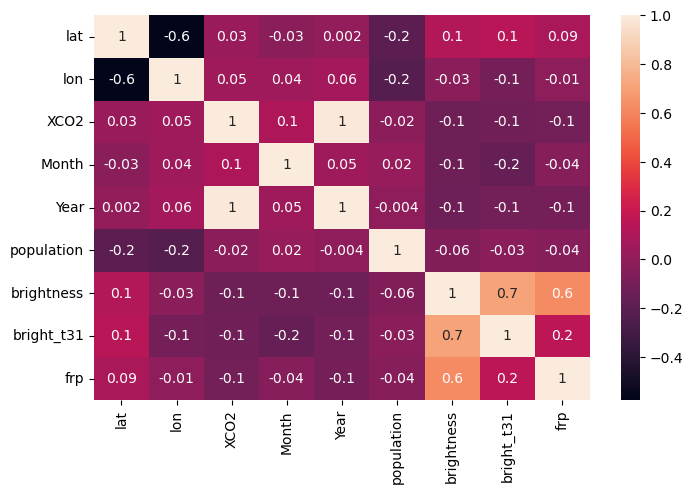

In [243]:
# visualizing the correlation matrix for variable to see how is the relationship among them
plt.figure(figsize=(8, 5))
sns.heatmap(data_model_1.corr(), annot=True, fmt=".1g")
plt.show()

Seems variables have no strong correlation among themselves but the problem also independent variables( lat, lon, Month,Year,population,brightness,bright_t31, frp) have no relavant relationship with the dependent/predicted variable(XCO2)

## Expolaration of the distributions of dataset

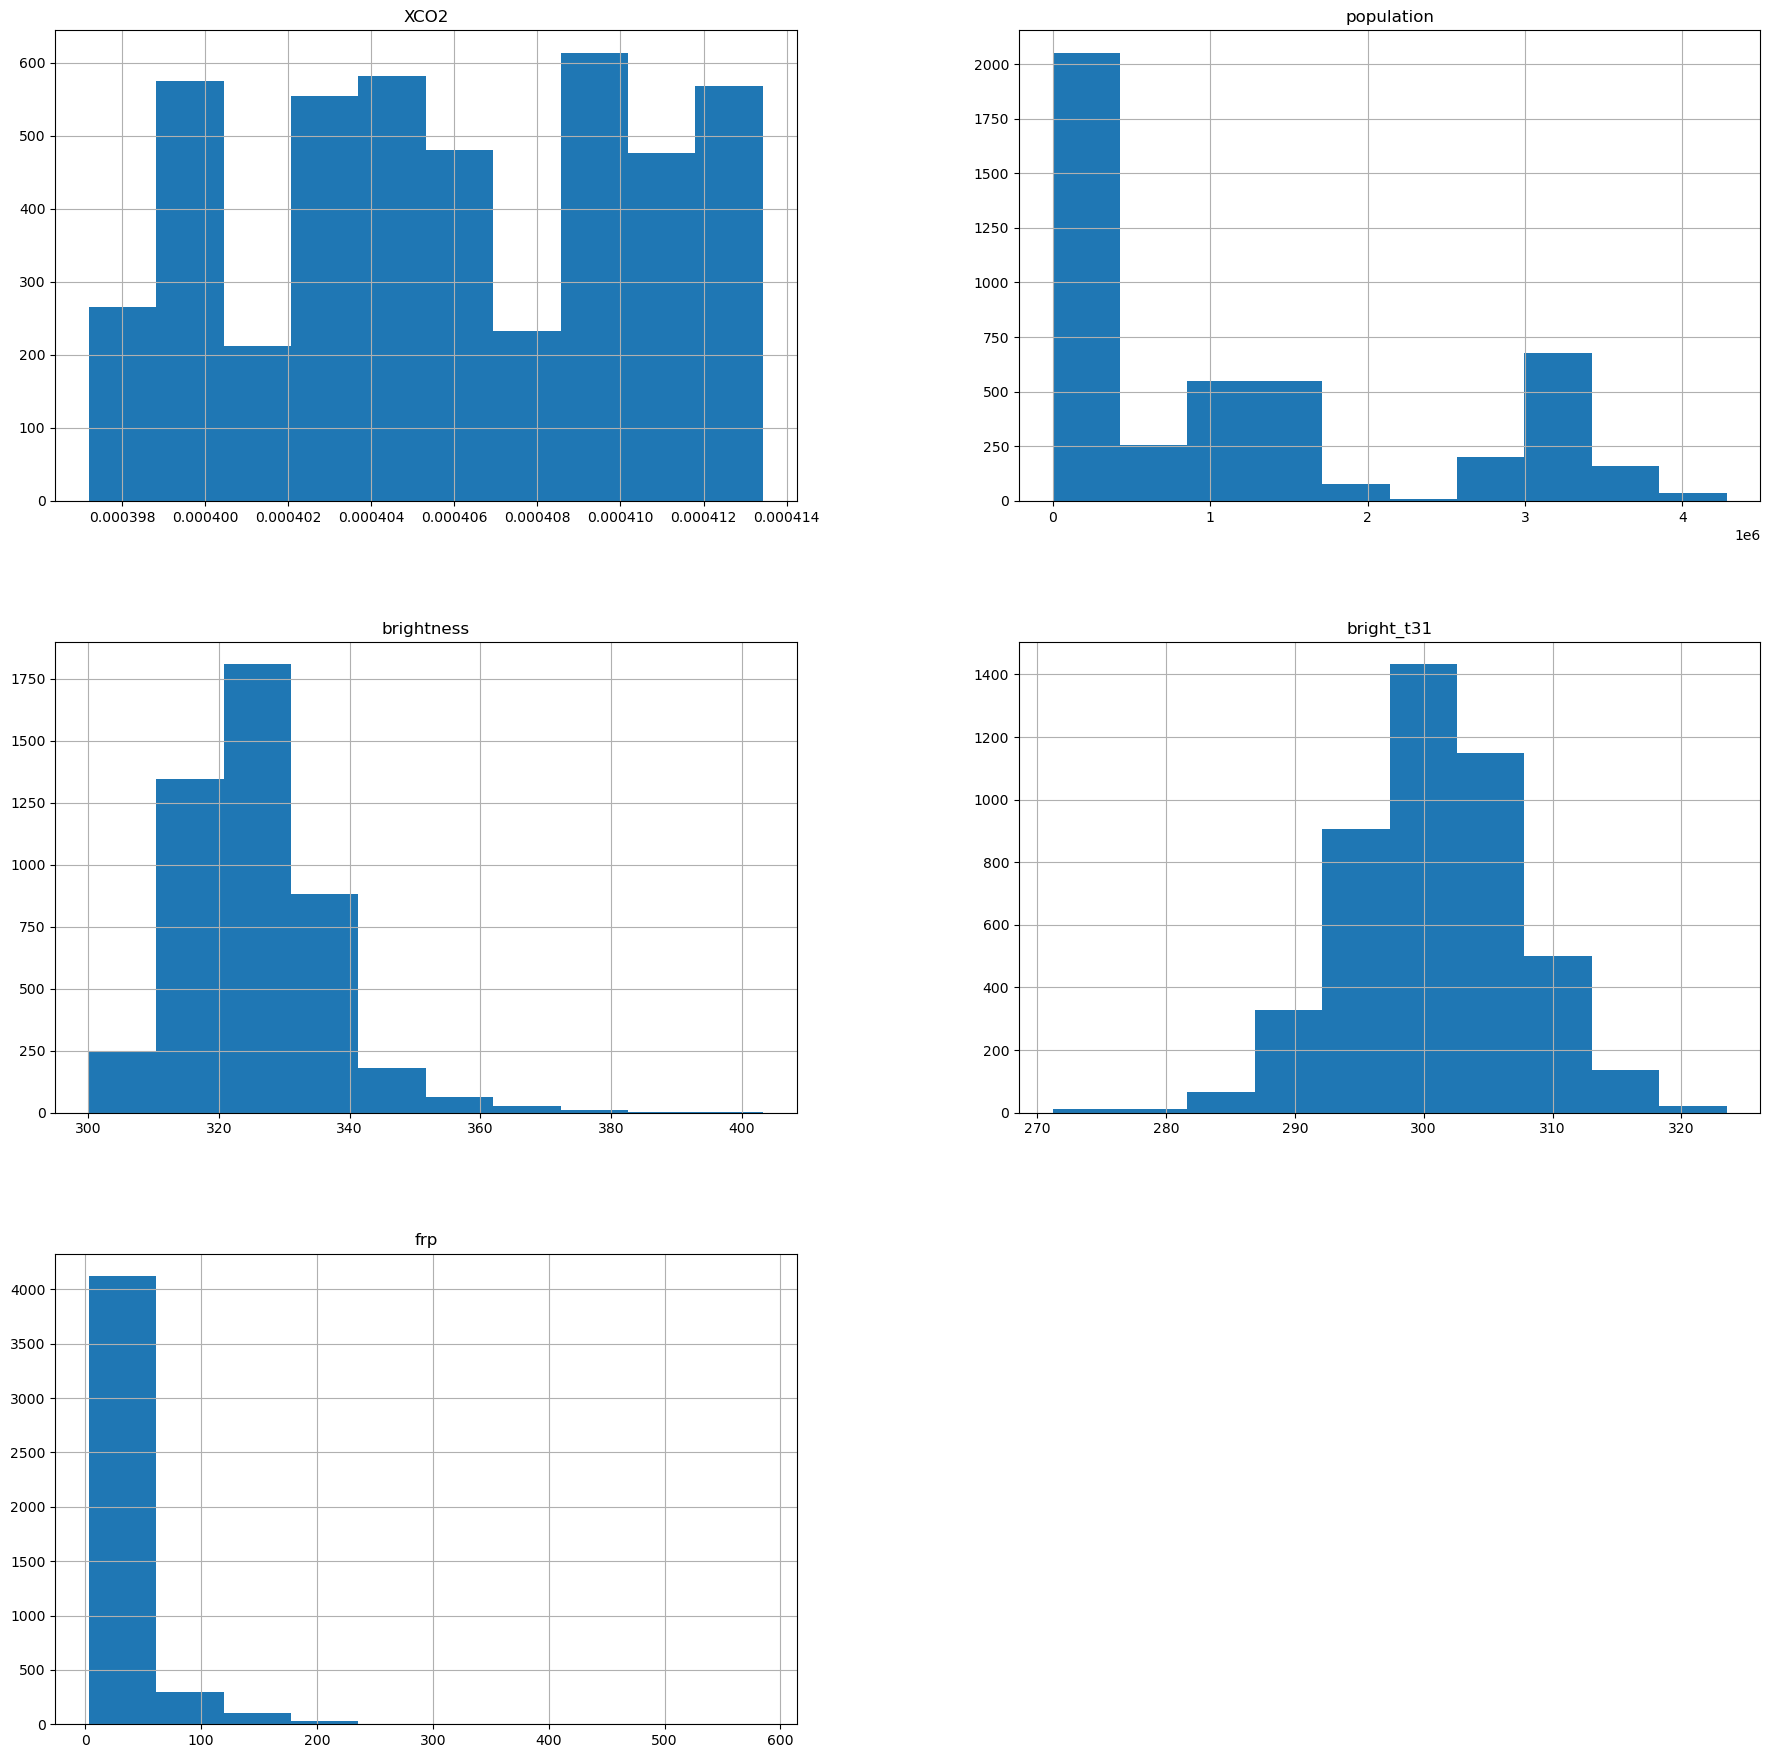

In [195]:
plt.rcParams["figure.figsize"] = (22,22)
data_model_1[["XCO2", "population", "brightness", "bright_t31", "frp"]].hist()
plt.show()

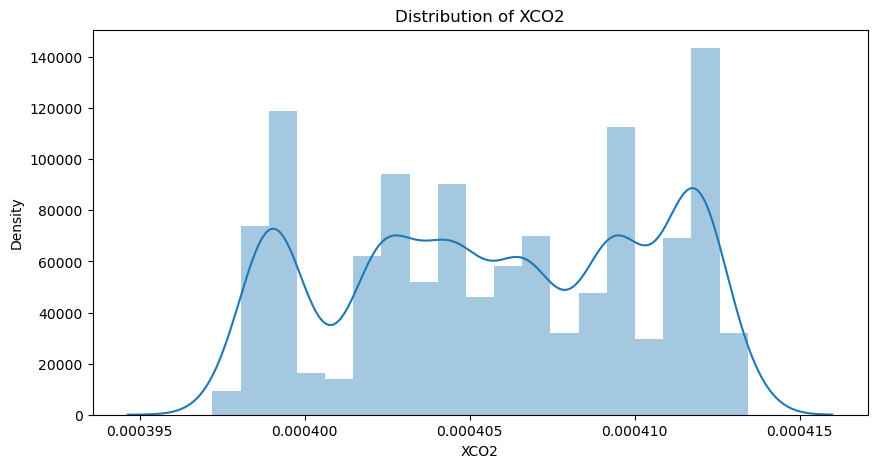

In [196]:
plt.rcParams["figure.figsize"] = (10,5)
sns.distplot(data_model_1["XCO2"])
plt.title("Distribution of XCO2")
plt.show()

### Separating dependent and Independent variables

In [197]:
X = data_model_1.drop(["XCO2"], axis=1)
y = data_model_1["XCO2"]

### Splitting dataset for training data and testing data

taking 80% for training and 20% for testing

In [198]:
random_state = 42
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=random_state, test_size=.2)

In [199]:
print(f"Training size: {len(X_train)}\nTesting size: {len(X_test)}")

Training size: 3648
Testing size: 913


In [200]:
## Training features "dataset
X_train.head()

,lat,lon,Month,Year,population,brightness,bright_t31,frp
1721,-1.0,35.000,4,2017,1504538.60,320.70,302.07,13.57
3291,2.0,35.625,9,2019,67307.91,340.20,311.55,73.50
1412,0.0,33.750,3,2016,1023048.56,343.55,304.68,51.77
4431,-0.5,34.375,11,2020,1664523.20,319.10,302.80,9.80
1512,0.5,33.750,12,2016,287390.50,327.30,313.10,5.80


In [201]:
## Test features dataset
X_test.head()

,lat,lon,Month,Year,population,brightness,bright_t31,frp
471,-4.5,39.375,3,2015,1190632.500,324.21,301.86,14.87
2646,-4.5,39.375,7,2018,1297475.600,311.00,292.20,14.90
23,-2.0,40.000,2,2015,107488.125,320.73,300.57,34.67
3477,-4.0,39.375,3,2019,1140857.100,329.53,301.08,17.92
135,-0.5,34.375,2,2015,1497430.800,330.44,307.19,28.69


In [202]:
## Target training dataset
y_train.head()

1721    0.000405
3291    0.000409
1412    0.000403
4431    0.000412
1512    0.000404
Name: XCO2, dtype: float64

In [203]:
## Target test dataset
y_test.head()

471     0.000399
2646    0.000407
23      0.000399
3477    0.000409
135     0.000399
Name: XCO2, dtype: float64

## Constructing the models

### Linear relationship and significance testing

In [204]:
ols_model_1 = sm.OLS(y_train, sm.add_constant(X_train))
osl_model_results_1 = ols_model.fit()

In [205]:
osl_model_results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   XCO2   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.770e+04
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:08:04   Log-Likelihood:                 47190.
No. Observations:                3648   AIC:                        -9.436e+04
Df Residuals:                    3639   BIC:                        -9.431e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0046    1.1e-05   -422.978      0.000      -0.005      -0.005
lat         5.595e-08   6.14e-09      9.111      0.000    4.39e-08     6.8e-08
lon        -1.148e-08   6.81e-09     -1.687      0.092   -2.48e-08    1.86e-09
Month        5.91e-08   2.68e-09     22.067      0.000    5.38e-08    6.44e-08
Year        2.502e-06   5.42e-09    461.494      0.000    2.49e-06    2.51e-06
population -4.681e-14   8.73e-15     -5.359      0.000   -6.39e-14   -2.97e-14
brightness  7.633e-09   1.85e-09      4.115      0.000       4e-09    1.13e-08
bright_t31 -1.195e-08    2.4e-09     -4.989      0.000   -1.66e-08   -7.25e-09
frp        -2.482e-09   4.57e-10     -5.436      0.000   -3.38e-09   -1.59e-09
==============================================================================
Omnibus:                       36.165   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.009
Skew:                           0.240   Prob(JB):                     9.20e-09
Kurtosis:                       3.112   Cond. No.                     1.95e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

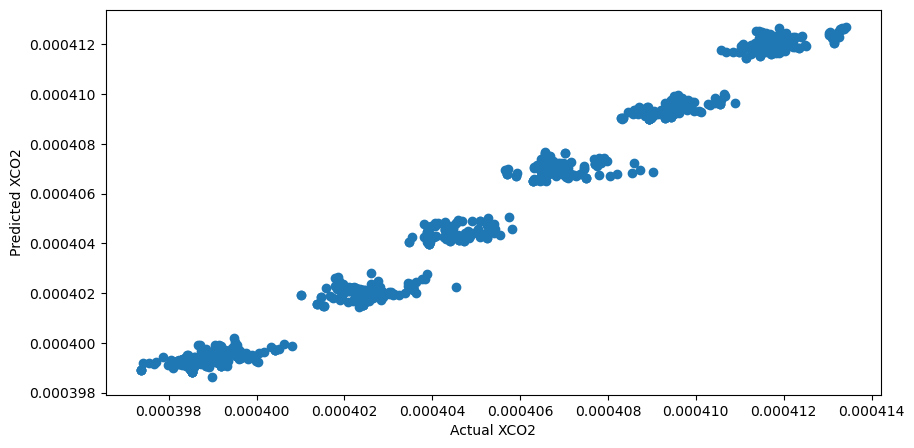

In [207]:
osl_model_results_1.predict(sm.add_constant(X_test))

plt.scatter(y_test, osl_model_results_1.predict(sm.add_constant(X_test)))
plt.xlabel("Actual XCO2")
plt.ylabel("Predicted XCO2")
plt.show()

In [208]:
y_test

471     0.000399
2646    0.000407
23      0.000399
3477    0.000409
135     0.000399
          ...   
4349    0.000412
408     0.000399
170     0.000399
540     0.000399
2413    0.000407
Name: XCO2, Length: 913, dtype: float64

### Linear regression model 1

In [209]:
lr_model_1 = LinearRegression(fit_intercept=True)
lr_model_1.fit(X_train, y_train)

LinearRegression()

In [342]:
print(f"""
R2 score of linear regression: {lr_model_1.score(X_test, y_test)}\n
Mean square error of linear regression: {mean_squared_error(y_test, lr_model_1.predict(X_test))}""")


R2 score of linear regression: 0.9843254435761882

Mean square error of linear regression: 3.440972952722156e-13


In [259]:
lr_model_1.coef_

array([ 5.59476848e-08, -1.14813166e-08,  5.90991573e-08,  2.50236325e-06,
       -4.68076633e-14,  7.63290699e-09, -1.19519226e-08, -2.48155569e-09])

## Adding more features


New features to be considered for model 2

**lat, lon, XCO2, Month, Year, population, brightness, bright_t31, frp, primary_fuel, capacity_mw, commissioning_year, plant_type**

**Primary fuel and plant type** have to be encoded, and we are using ordinary encoding for this

In [250]:
primary_fuel_values = pop_cleaned_df["primary_fuel"].unique()
plant_type_values = pop_cleaned_df["plant_type"].unique()

# mapping each primary fuel value with a numerical value
primary_fuel_values_dict = { value: indx for indx, value in enumerate(primary_fuel_values)}
plant_type_values_dict = { value:indx for indx, value in enumerate(plant_type_values)}

print("\nPrimary fuels encoded into numerical values\n")
for key, value in primary_fuel_values_dict.items():
    print(f"{value}: {key}")
    
print("\nPlant type encoded into numerical values\n")
for key, value in plant_type_values_dict.items():
    print(f"{value}: {key}")


Primary fuels encoded into numerical values

0: Hydro
1: Oil
2: Geothermal
3: Wind

Plant type encoded into numerical values

0: Cement 
1: Steel
2: Oil refineries


### Ordinal Encoding of primary fuel and plant_type

In [253]:
## Before encoding
pop_cleaned_df

,lat,lon,XCO2,Month,Year,population,brightness,bright_t31,frp,primary_fuel,capacity_mw,commissioning_year,plant_type
0,0.5,34.375,0.000400,4,2015,48942.63,319.10,298.30,16.50,Hydro,168.0,1987,Cement
1,-4.0,38.125,0.000398,4,2015,48942.63,321.80,298.60,20.50,Hydro,168.0,1987,Cement
2,-4.0,38.125,0.000398,1,2015,48942.63,326.07,306.33,17.79,Hydro,168.0,1987,Cement
3,-4.0,38.125,0.000399,3,2015,48942.63,333.87,313.50,26.73,Hydro,168.0,1987,Cement
4,-4.0,38.125,0.000399,9,2015,48942.63,327.76,297.32,60.66,Hydro,168.0,1987,Cement
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,-4.5,39.375,0.000411,2,2020,1377696.60,325.20,301.30,11.80,Oil,74.0,2011,Cement
4557,-1.0,35.625,0.000411,1,2020,488609.70,321.20,296.65,21.25,Oil,74.0,2011,Oil refineries
4558,-4.5,39.375,0.000411,2,2020,1377696.60,325.20,301.30,11.80,Oil,74.0,2011,Oil refineries
4559,-4.5,39.375,0.000411,1,2020,1377696.60,314.40,294.15,30.35,Oil,120.0,1999,Cement


In [314]:
## After ordinal encoding
data_model_2 = pop_cleaned_df.replace({"primary_fuel": primary_fuel_values_dict, "plant_type": plant_type_values_dict})

data_model_2

,lat,lon,XCO2,Month,Year,population,brightness,bright_t31,frp,primary_fuel,capacity_mw,commissioning_year,plant_type
0,0.5,34.375,0.000400,4,2015,48942.63,319.10,298.30,16.50,0,168.0,1987,0
1,-4.0,38.125,0.000398,4,2015,48942.63,321.80,298.60,20.50,0,168.0,1987,0
2,-4.0,38.125,0.000398,1,2015,48942.63,326.07,306.33,17.79,0,168.0,1987,0
3,-4.0,38.125,0.000399,3,2015,48942.63,333.87,313.50,26.73,0,168.0,1987,0
4,-4.0,38.125,0.000399,9,2015,48942.63,327.76,297.32,60.66,0,168.0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,-4.5,39.375,0.000411,2,2020,1377696.60,325.20,301.30,11.80,1,74.0,2011,0
4557,-1.0,35.625,0.000411,1,2020,488609.70,321.20,296.65,21.25,1,74.0,2011,2
4558,-4.5,39.375,0.000411,2,2020,1377696.60,325.20,301.30,11.80,1,74.0,2011,2
4559,-4.5,39.375,0.000411,1,2020,1377696.60,314.40,294.15,30.35,1,120.0,1999,0


In [343]:
X_2 = data_model_2[["lat", "lon", "primary_fuel", "frp", "capacity_mw", "commissioning_year"]]
y_2 = data_model_2["XCO2"]

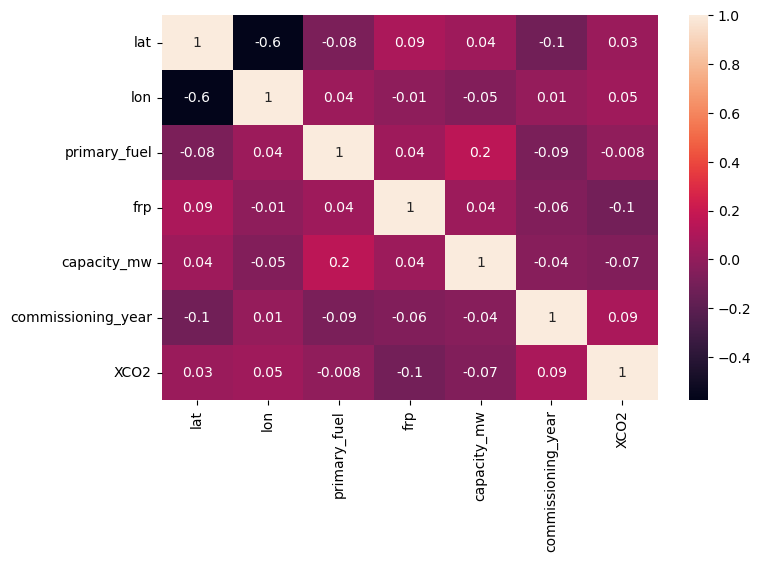

In [344]:
plt.figure(figsize=(8, 5))
sns.heatmap(data_model_2[["lat", "lon", "primary_fuel", "frp", "capacity_mw", 
                          "commissioning_year", "XCO2"]].corr(), annot=True, fmt=".1g")
plt.show()

In [345]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, random_state=random_state, test_size=.2)

In [346]:
ols_model_2 = sm.OLS(y_2_train, sm.add_constant(X_2_train))
osl_model_results_2 = ols_model_2.fit()

In [347]:
osl_model_results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   XCO2   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     19.24
Date:                Mon, 19 Dec 2022   Prob (F-statistic):           3.41e-22
Time:                        16:43:07   Log-Likelihood:                 39722.
No. Observations:                3648   AIC:                        -7.943e+04
Df Residuals:                    3641   BIC:                        -7.939e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003   1.55e-05     20.401      0.000       0.000       0.000
lat                  2.53e-07   4.38e-08      5.772      0.000    1.67e-07    3.39e-07
lon                 2.685e-07   4.78e-08      5.615      0.000    1.75e-07    3.62e-07
primary_fuel        8.921e-08   8.43e-08      1.059      0.290    -7.6e-08    2.54e-07
frp                -1.505e-08   2.35e-09     -6.395      0.000   -1.97e-08   -1.04e-08
capacity_mw        -4.417e-09   1.21e-09     -3.665      0.000   -6.78e-09   -2.05e-09
commissioning_year  4.041e-08   7.63e-09      5.298      0.000    2.55e-08    5.54e-08
==============================================================================
Omnibus:                     3388.049   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.785
Skew:                          -0.090   Prob(JB):                     3.45e-50
Kurtosis:                       1.789   Cond. No.                     4.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear regression model 2

In [348]:
lr_model_2 = LinearRegression(fit_intercept=True)
lr_model_2.fit(X_2_train, y_2_train)

print(f"""
R2 score of linear regression: {lr_model_2.score(X_2_test, y_2_test)}\n
Mean square error of linear regression: {mean_squared_error(y_2_test, lr_model_2.predict(X_2_test))}""")


R2 score of linear regression: 0.04217749699768458

Mean square error of linear regression: 2.1026695985685336e-11


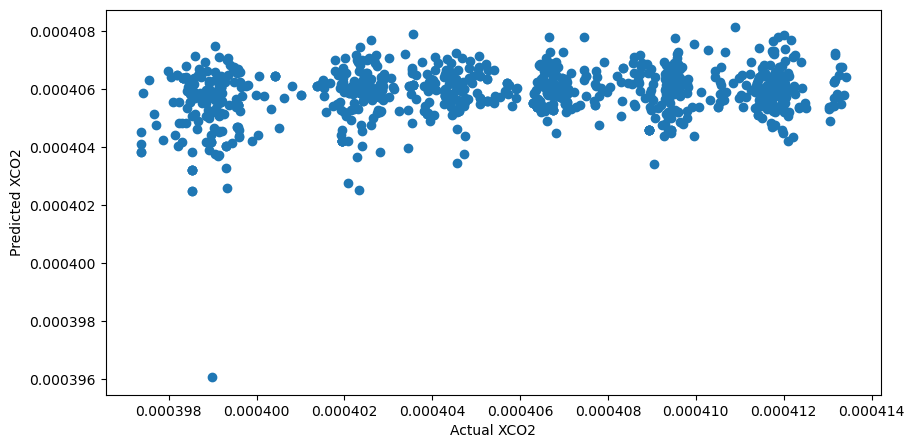

In [349]:
plt.scatter(y_2_test, lr_model_2.predict(X_2_test))
plt.xlabel("Actual XCO2")
plt.ylabel("Predicted XCO2")
plt.show()